In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from os import listdir
import math

def parse_pose_25(Dir):
        
        f = open(Dir)
        data = json.load(f)
        arr = data['people'][0]['pose_keypoints_2d']
        Map = ['Nose', 'Neck', 'RShoulder', 'RElbow' ,'RWrist', 'LShoulder',
               'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip',
               'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe',
               'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel']

        Dict = {}
        for i in range(25):
            j=i*3
            Dict[Map[i]] = [arr[j], 1-arr[j+1], arr[j+2]]
            
        return Dict
    
def fix_unseen_joints(frames):
    Map = ['Nose', 'Neck', 'RShoulder', 'RElbow' ,'RWrist', 'LShoulder',
               'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip',
               'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe',
               'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel']
    
    for i in range(len(frames)):
        for joint in Map:
            if frames[i][joint][-1] == 0:
                frames[i][joint] = frames[i-1][joint]
    return frames

def getDistance_2pts(p1, p2):
        return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    
def getAngle_2pts(p1, p2, degree=False):
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    angle = math.atan2(dy, dx)

    if degree:
        angle = math.degrees(angle)

    return angle


Map = ['Nose', 'Neck', 'RShoulder', 'RElbow' ,'RWrist', 'LShoulder',
               'LElbow', 'LWrist', 'MidHip', 'RHip', 'RKnee', 'RAnkle', 'LHip',
               'LKnee', 'LAnkle', 'REye', 'LEye', 'REar', 'LEar', 'LBigToe',
               'LSmallToe', 'LHeel', 'RBigToe', 'RSmallToe', 'RHeel']

In [55]:
list_json_raw = listdir('frames/pose/')
list_json = [('frame' + str(i+1) + '_keypoints.json') for i in range(len(list_json_raw)) if (str(list_json_raw[i]))[-4:] == "json"]


frames = []
for file_name in list_json:
    frames.append(parse_pose_25('frames/pose/' + file_name))

In [38]:
f = open('frames/my_fps.txt', 'r')
r = f.read()
f.close()

print(type(float(r)))

<class 'float'>


In [8]:
print(list_json)

['frame1_keypoints.json', 'frame2_keypoints.json', 'frame3_keypoints.json', 'frame4_keypoints.json', 'frame5_keypoints.json', 'frame6_keypoints.json', 'frame7_keypoints.json', 'frame8_keypoints.json', 'frame9_keypoints.json', 'frame10_keypoints.json', 'frame11_keypoints.json', 'frame12_keypoints.json', 'frame13_keypoints.json', 'frame14_keypoints.json', 'frame15_keypoints.json', 'frame16_keypoints.json', 'frame17_keypoints.json', 'frame18_keypoints.json', 'frame19_keypoints.json', 'frame20_keypoints.json', 'frame21_keypoints.json', 'frame22_keypoints.json', 'frame23_keypoints.json', 'frame24_keypoints.json', 'frame25_keypoints.json', 'frame26_keypoints.json', 'frame27_keypoints.json', 'frame28_keypoints.json', 'frame29_keypoints.json', 'frame30_keypoints.json', 'frame31_keypoints.json', 'frame32_keypoints.json']


In [28]:
for i, f in enumerate(frames):
    print('Frame:', i+1)
    for j, l in enumerate(list(f.values())):
        print(str(j)+':', l[-1])
    print()

Frame: 1
0: 0.914991
1: 0.8914
2: 0.83524
3: 0.863815
4: 0.784341
5: 0.840182
6: 0.873317
7: 0.848228
8: 0.646325
9: 0.640692
10: 0.657894
11: 0.804119
12: 0.639938
13: 0.614038
14: 0.840932
15: 0.925592
16: 0.930549
17: 0.911456
18: 0.908597
19: 0.689335
20: 0.686162
21: 0.701578
22: 0.725332
23: 0.699683
24: 0.66683

Frame: 2
0: 0.910163
1: 0.897374
2: 0.840719
3: 0.881066
4: 0.814798
5: 0.847171
6: 0.876253
7: 0.848355
8: 0.643165
9: 0.639399
10: 0.668752
11: 0.81996
12: 0.644266
13: 0.631177
14: 0.841798
15: 0.926895
16: 0.927869
17: 0.902434
18: 0.911383
19: 0.727265
20: 0.699014
21: 0.703826
22: 0.749237
23: 0.714199
24: 0.722022

Frame: 3
0: 0.913515
1: 0.899507
2: 0.825913
3: 0.843798
4: 0.836627
5: 0.849675
6: 0.835558
7: 0.851739
8: 0.657865
9: 0.651963
10: 0.665152
11: 0.818872
12: 0.635325
13: 0.622119
14: 0.856822
15: 0.925052
16: 0.91979
17: 0.892054
18: 0.914886
19: 0.73897
20: 0.750256
21: 0.732594
22: 0.759903
23: 0.721488
24: 0.758367

Frame: 4
0: 0.917487
1: 0.864537

In [29]:
for i in range(len(frames)):
    for joint in Map:
        if frames[i][joint][-1] == 0:
            frames[i][joint] = frames[i-1][joint]

In [40]:
for i, frame in enumerate(frames):
    dd = getDistance_2pts(frame['RKnee'][:-1], frame['RAnkle'][:-1])
    #print('Right shin length frame('+str(i+1)+'):' , dd)
    
    dd = getDistance_2pts(frame['LKnee'][:-1], frame['LAnkle'][:-1])
    #print('Left shin length frame('+str(i+1)+'):' , dd)
    
    dd = getDistance_2pts(frame['Nose'][:-1], frame['Neck'][:-1])
    print('nose neck length frame('+str(i+1)+'):' , dd)

nose neck length frame(1): 82.40021773660551
nose neck length frame(2): 82.31138909677081
nose neck length frame(3): 80.41449168582739
nose neck length frame(4): 74.67792024581294
nose neck length frame(5): 72.59759059231925
nose neck length frame(6): 68.56510842994416
nose neck length frame(7): 64.79011834847965
nose neck length frame(8): 69.01099100317282
nose neck length frame(9): 61.54762577256739
nose neck length frame(10): 63.8507383575946
nose neck length frame(11): 70.56472473098722
nose neck length frame(12): 67.04268352147014
nose neck length frame(13): 72.62558195904523
nose neck length frame(14): 82.37669906083879
nose neck length frame(15): 82.2433134296643
nose neck length frame(16): 80.34053137271376
nose neck length frame(17): 78.46668169356981
nose neck length frame(18): 80.34013204494998
nose neck length frame(19): 82.4439315908697
nose neck length frame(20): 80.59449787894954
nose neck length frame(21): 82.3058337135953
nose neck length frame(22): 82.61865829877657
n

angle_diff2 frame(1): 2.7924072432874905


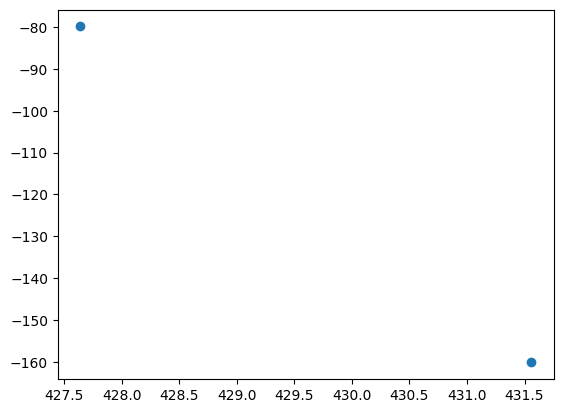

angle_diff2 frame(2): 2.7895046832391897


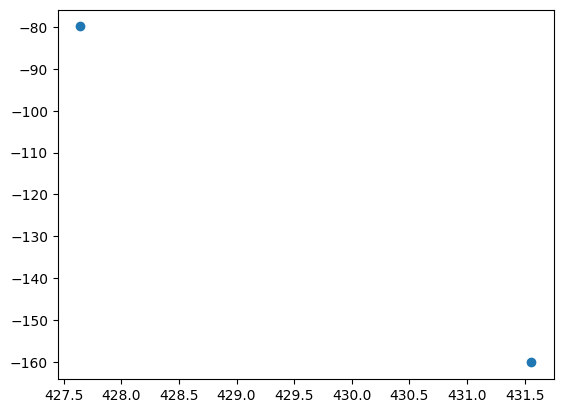

angle_diff2 frame(5): 8.600155033482311


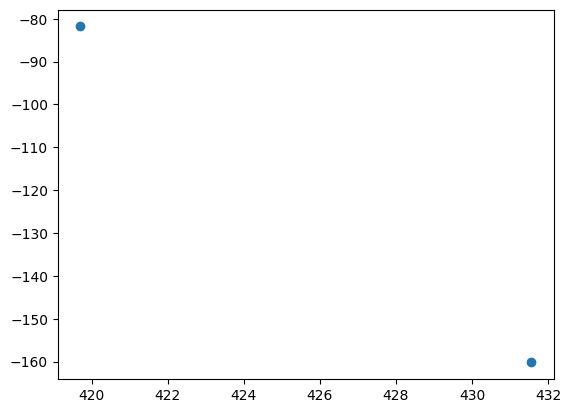

angle_diff2 frame(6): 0.012122363085258268


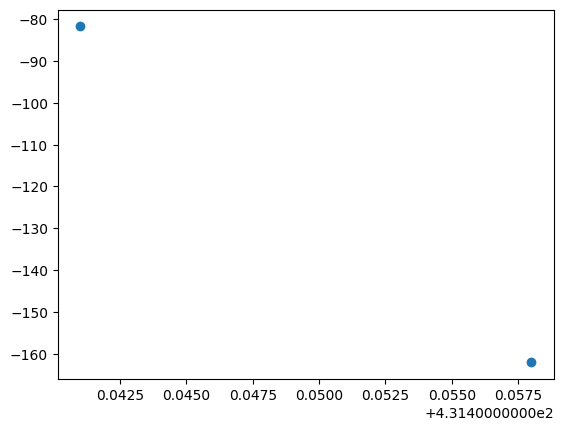

angle_diff2 frame(7): -2.768594725112086


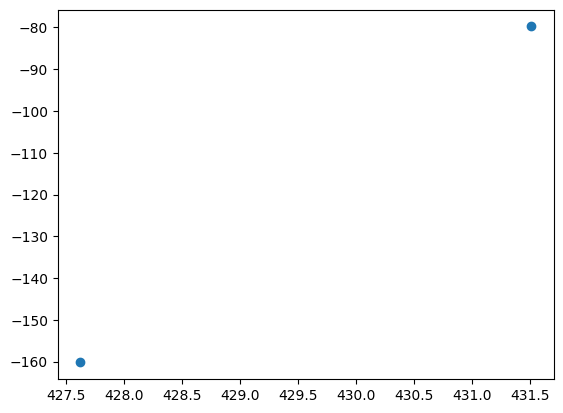

angle_diff2 frame(10): 1.4066422203276134


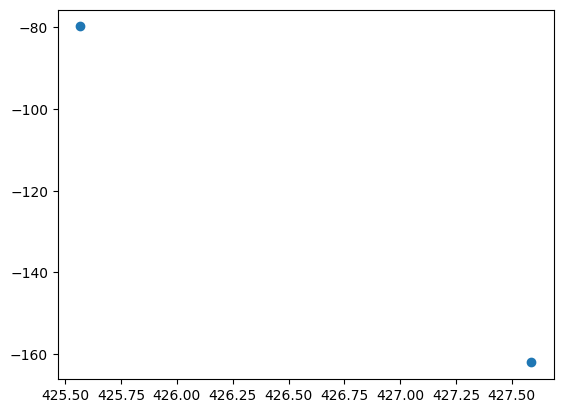

angle_diff2 frame(11): 4.2491001936902775


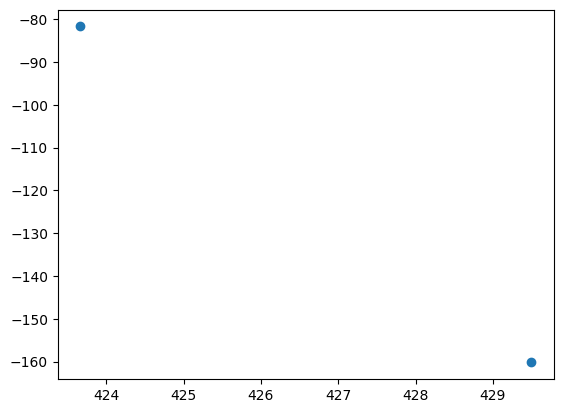

angle_diff2 frame(12): 35.93824818298156


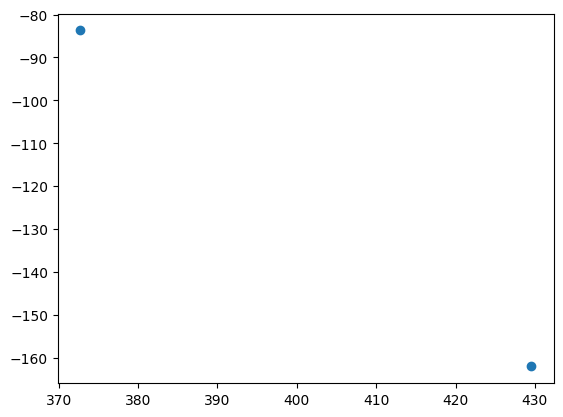

angle_diff2 frame(13): 39.02264721294808


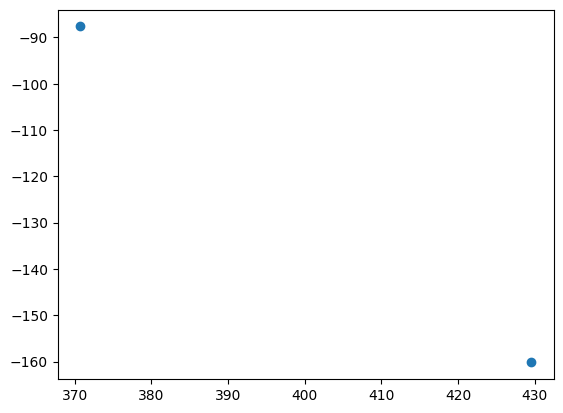

angle_diff2 frame(14): 20.385336333988175


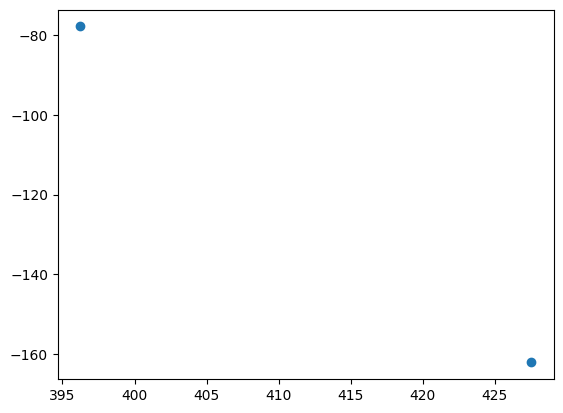

angle_diff2 frame(15): -2.6236528173325073


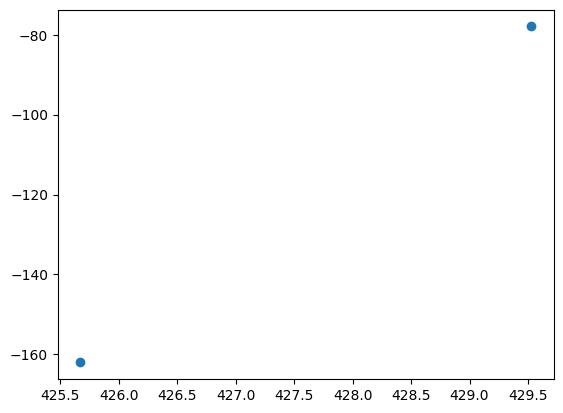

angle_diff2 frame(16): -2.6621058493008602


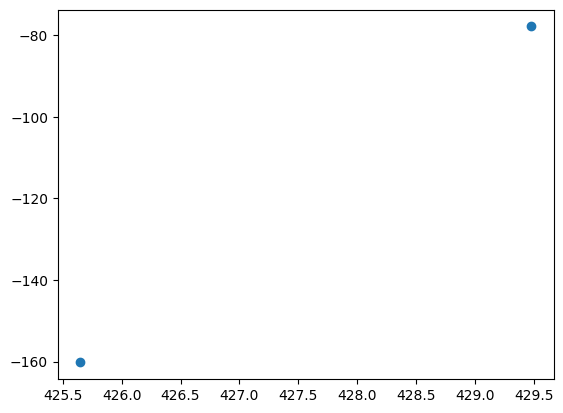

angle_diff2 frame(17): -1.3761924920864606


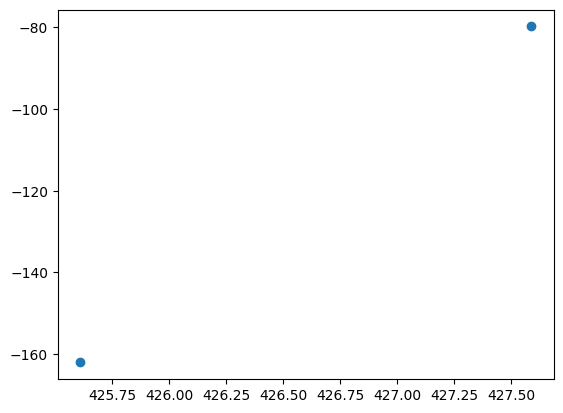

In [66]:
for frame_num, frame in enumerate(frames):
    angel_diff = getAngle_2pts(frame['REar'][:-1], frame['LEar'][:-1])
    print('angle_diff1 frame('+str(frame_num+1)+'):' , math.degrees(angel_diff))
    
    
    if abs(angel_diff) < math.radians(15):
        angel_diff2 = getAngle_2pts(frame['Nose'][:-1], frame['Neck'][:-1]) + math.radians(90)

        print('angle_diff2 frame('+str(frame_num+1)+'):' , math.degrees(angel_diff2))

In [6]:
list_json_raw = listdir('pose_ex/')
list_json = [('frame' + str(i+1) + '_keypoints.json') for i in range(len(list_json_raw)) if (str(list_json_raw[i]))[-4:] == "json"]
list_json = ['1_keypoints.json']

frames = []
for file_name in list_json:
    frames.append(parse_pose_25('pose_ex/' + file_name))

ShoulderLeft 172.61562389531628


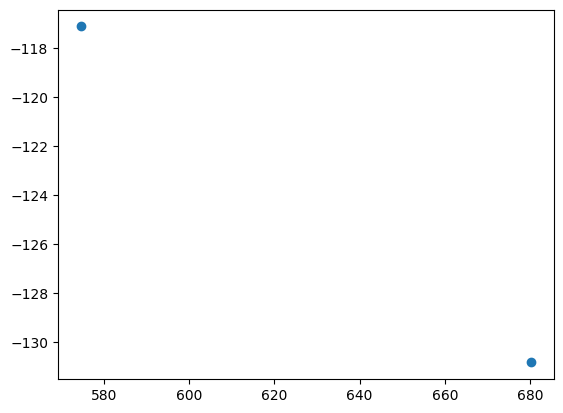

ShoulderRight 5.165083098500636


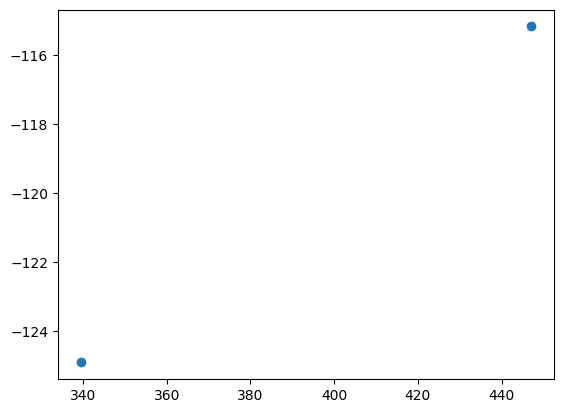

ThighLeft 87.74013493287431


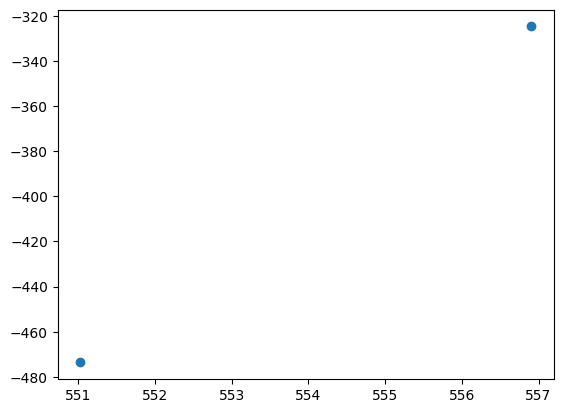

ThighRight 87.81327034500472


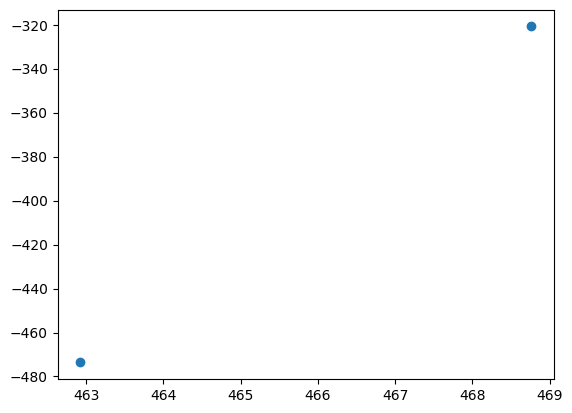

In [10]:

bones_map_Y = [['ShoulderLeft', 'LShoulder', 'LElbow'],
                 ['ShoulderRight', 'RShoulder', 'RElbow'],
                 ['ThighLeft', 'LHip', 'LKnee'],
                 ['ThighRight', 'RHip', 'RKnee']]

for x1,x2,x3 in bones_map_Y:
    #intial_angle = getAngle_2pts(list(bones[x1].bone.tail)[::2], list(bones[x1].bone.head)[::2], degree=True)
    fream1_angle = getAngle_2pts(frames[0][x3][:-1], frames[0][x2][:-1], degree=True)
    print(x1, fream1_angle)
    plt.scatter([frames[0][x3][0], frames[0][x2][0]], [frames[0][x3][1], frames[0][x2][1]])
    plt.show()
    
    

In [68]:
math.radians(76.36)

1.33273341682287

In [4]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [26]:
import cv2
import skimage.io as io
from math import floor


vidcap = cv2.VideoCapture('pose_ex/3.mp4')

min_fps = 4
resize_factor = 2


fps = vidcap.get(cv2.CAP_PROP_FPS)
frames_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frames_count/fps

frames = floor(duration*min_fps)
frames_gap = frames_count // frames
frames_taken = frames_count // frames_gap
frames_dropped = (frames_count-1) % frames_gap
my_fps = frames_taken / (duration - (frames_dropped*(1/fps)))

success,image = vidcap.read()
frames_count = 0
gap = 0
while success:    
    if gap == 0:
        frames_count += 1
        resized_image = cv2.resize(image, (1280//resize_factor, 720//resize_factor), interpolation = cv2.INTER_NEAREST)
        #show_images([resized_image], [frames_count])
        cv2.imwrite("pose_ex/frames/frame%d.jpg" % frames_count, resized_image)     # save frame as JPG file      
        success, image = vidcap.read()
        gap += frames_gap-1
        continue

    success, _ = vidcap.read()
    gap -= 1

#saving my_fps in my_fps.txt
f = open("pose_ex/my_fps.txt", "a")
f.write(str(my_fps))
f.close()

In [ ]:
for frame_num, frame in enumerate(frames):
    angel_diff = getAngle_2pts(frame['REar'][:-1], frame['LEar'][:-1])
    print('angle_diff1 frame('+str(frame_num+1)+'):' , math.degrees(angel_diff))